In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
import preprocessing as ps
warnings.filterwarnings('ignore')
sns.set_theme(style="whitegrid", palette="Set2")


<section style="font-family: Arial, sans-serif; padding: 20px; border-radius: 10px;">
  <h2>🧠 Problem Statement:</h2>
  <p style="line-height: 1.6;">
    Predict how much tip a customer will give based on factors like their total bill, gender, time of day, whether they smoke, and group size.
  </p>
  <p style="font-weight: bold; color: #2980b9;">
    This is a regression problem because the target (<code>tip</code>) is a continuous numerical value.
  </p>

  <h2 >📊 Dataset Features Explained:</h2>
  <table style="width: 100%; border-collapse: collapse;border: 1px solid #ccc;">
    <thead>
      <tr>
        <th style="padding: 10px; border: 1px solid #ccc;">Feature</th>
        <th style="padding: 10px; border: 1px solid #ccc;">Type</th>
        <th style="padding: 10px; border: 1px solid #ccc;">Description</th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <td style="padding: 10px; border: 1px solid #ccc;">total_bill</td>
        <td style="padding: 10px; border: 1px solid #ccc;">Numerical</td>
        <td style="padding: 10px; border: 1px solid #ccc;">The total cost of the meal (before tip).</td>
      </tr>
      <tr>
        <td style="padding: 10px; border: 1px solid #ccc;">tip</td>
        <td style="padding: 10px; border: 1px solid #ccc;">Numerical</td>
        <td style="padding: 10px; border: 1px solid #ccc;">The amount of money given to the waiter as a tip. (This is the target)</td>
      </tr>
      <tr>
        <td style="padding: 10px; border: 1px solid #ccc;">sex</td>
        <td style="padding: 10px; border: 1px solid #ccc;">Categorical</td>
        <td style="padding: 10px; border: 1px solid #ccc;">Gender of the person paying the bill (Male, Female).</td>
      </tr>
      <tr>
        <td style="padding: 10px; border: 1px solid #ccc;">smoker</td>
        <td style="padding: 10px; border: 1px solid #ccc;">Categorical</td>
        <td style="padding: 10px; border: 1px solid #ccc;">Whether the person is a smoker (Yes, No).</td>
      </tr>
      <tr>
        <td style="padding: 10px; border: 1px solid #ccc;">day</td>
        <td style="padding: 10px; border: 1px solid #ccc;">Categorical</td>
        <td style="padding: 10px; border: 1px solid #ccc;">Day of the week when the meal took place (Thur, Fri, Sat, Sun).</td>
      </tr>
      <tr>
        <td style="padding: 10px; border: 1px solid #ccc;">time</td>
        <td style="padding: 10px; border: 1px solid #ccc;">Categorical</td>
        <td style="padding: 10px; border: 1px solid #ccc;">Time of day of the meal (Lunch, Dinner).</td>
      </tr>
      <tr>
        <td style="padding: 10px; border: 1px solid #ccc;">size</td>
        <td style="padding: 10px; border: 1px solid #ccc;">Numerical</td>
        <td style="padding: 10px; border: 1px solid #ccc;">Number of people in the dining party.</td>
      </tr>
    </tbody>
  </table>
  <h2 style="color: #2c3e50; margin-top: 20px;">🎯 Objective:</h2>
  <p style="line-height: 1.6;">
    Build a machine learning model that can <strong>predict the tip amount</strong> based on the other columns.
  </p>
</section>


In [27]:
df=pd.read_csv('../datasets/tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<h3>Dataset Overview</h3>

In [28]:
ps.dataset_analysis(df,target_column='tip')

Dataset Shape (Rows & Columns)
Rows :- 244
Columns :- 7
Unique Rows: 243 (99.59%)
Duplicate Rows: 1 (0.41%)

Columns with Null Values and Null Value Counts
No columns contain null values.

Data Type Wise Column Count
object     4
float64    2
int64      1
Name: count, dtype: int64

Discrete And Continous Data Analysis
Discrete Text Columns : sex, smoker, day, time


Discrete Numeric Columns : size


Continuous Columns : total_bill, tip


Unknown Columns : -----

Skewness of Numerical Columns
total_bill: 1.13 -> Strong Positive Skew. Consider transformation (e.g., log or square root)
tip: 1.47 -> Strong Positive Skew. Consider transformation (e.g., log or square root)

Constant Unique Values in Categorical Columns

Unique Values in Categorical Columns
sex: ['Female', 'Male']

smoker: ['No', 'Yes']

day: ['Fri', 'Sat', 'Sun', 'Thur']

time: ['Dinner', 'Lunch']

size: [1, 2, 3, 4, 5, 6]


Imbalance Analysis for 'tip'
The dataset is imbalanced with respect to 'tip'.


<h3>Data Preprocessing & EDA</h3>

In [40]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [29]:
df.select_dtypes('object').columns

Index(['sex', 'smoker', 'day', 'time'], dtype='object')

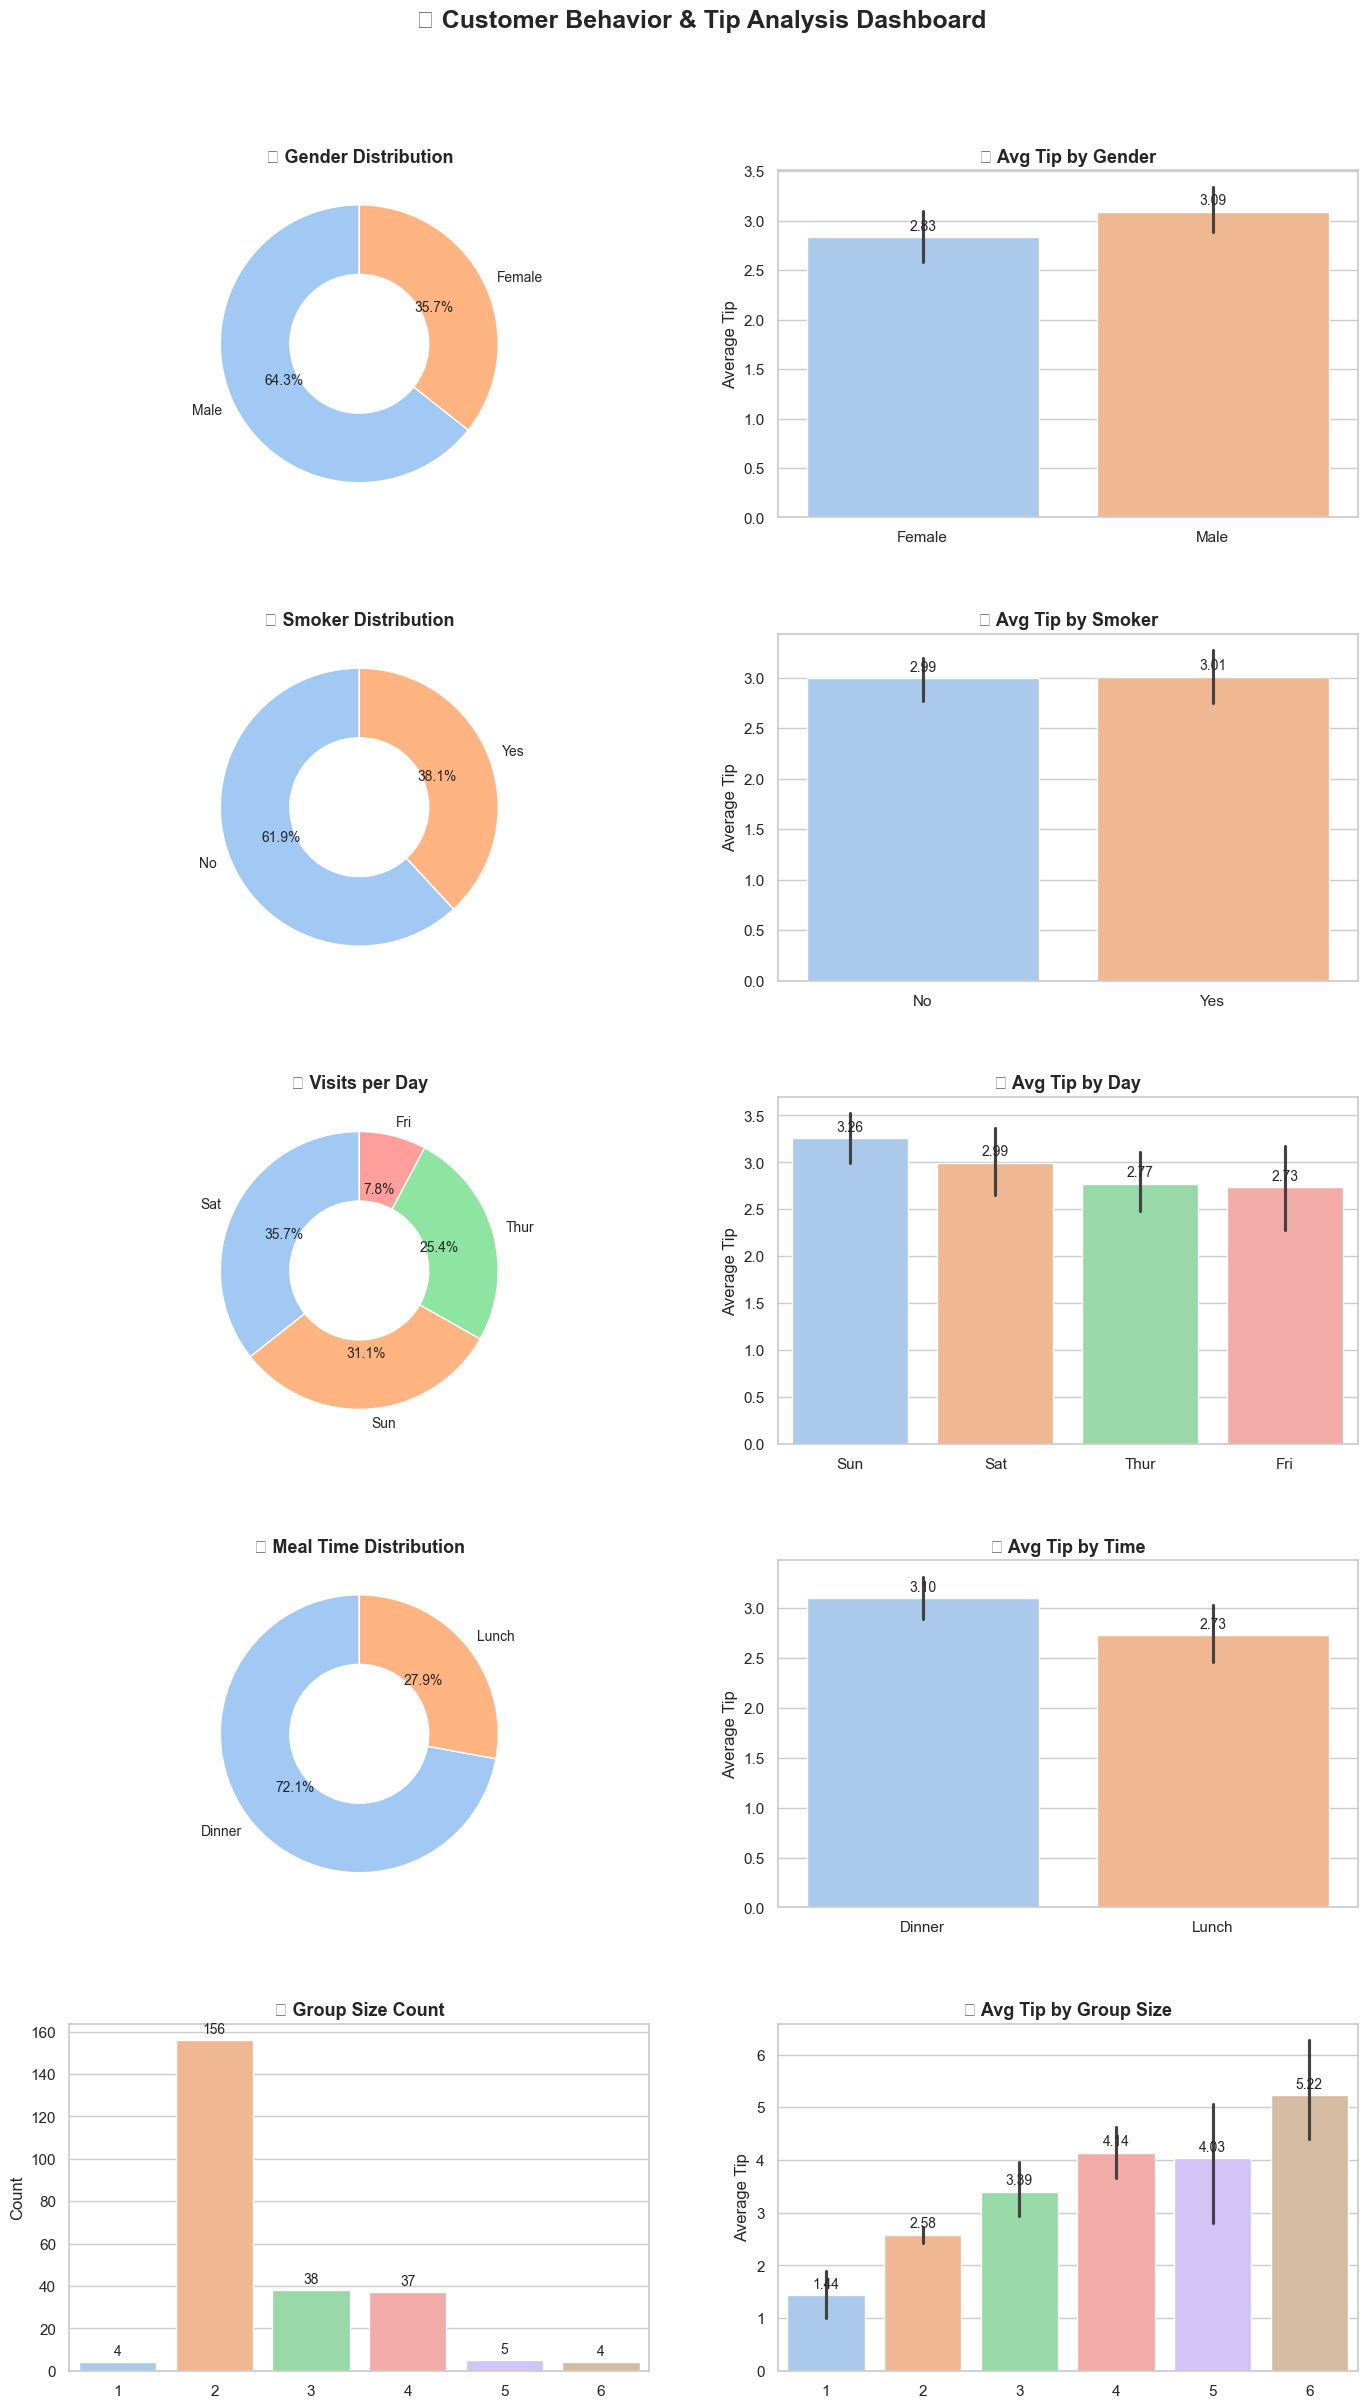

In [35]:
# Setup figure (5 rows, 2 columns)
fig, axs = plt.subplots(5, 2, figsize=(15, 24))
fig.tight_layout(pad=5.0)

# -------- Pie Chart Helper --------
def pie_chart(ax, data, column, title):
    counts = data[column].value_counts()
    colors = sns.color_palette("pastel", len(counts))
    wedges, texts, autotexts = ax.pie(
        counts,
        labels=counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
        wedgeprops=dict(width=0.5, edgecolor='w')  # donut style
    )
    for text in texts + autotexts:
        text.set_fontsize(10)
    ax.set_title(title, fontsize=13, fontweight='bold')

# -------- Bar Chart with Value Labels --------
def bar_chart(ax, data, x, y, title):
    chart = sns.barplot(data=data, x=x, y=y, ax=ax, palette="pastel", estimator='mean')
    ax.set_title(title, fontsize=13, fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('Average Tip')
    ax.tick_params(axis='x', labelrotation=0)
    
    for container in chart.containers:
        ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=10, padding=3)

# -------- Count Chart (for Size distribution) --------
def count_chart(ax, data, x, title):
    chart = sns.countplot(data=data, x=x, ax=ax, palette="pastel")
    ax.set_title(title, fontsize=13, fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('Count')
    for container in chart.containers:
        ax.bar_label(container, label_type='edge', fontsize=10, padding=3)

# Row 1 - Gender
pie_chart(axs[0, 0], df, "sex", "🧍 Gender Distribution")
bar_chart(axs[0, 1], df, "sex", "tip", "💰 Avg Tip by Gender")

# Row 2 - Smoker
pie_chart(axs[1, 0], df, "smoker", "🚬 Smoker Distribution")
bar_chart(axs[1, 1], df, "smoker", "tip", "💰 Avg Tip by Smoker")

# Row 3 - Day
pie_chart(axs[2, 0], df, "day", "📅 Visits per Day")
bar_chart(axs[2, 1], df, "day", "tip", "💰 Avg Tip by Day")

# Row 4 - Time
pie_chart(axs[3, 0], df, "time", "🕒 Meal Time Distribution")
bar_chart(axs[3, 1], df, "time", "tip", "💰 Avg Tip by Time")

# Row 5 - Size
count_chart(axs[4, 0], df, "size", "👥 Group Size Count")
bar_chart(axs[4, 1], df, "size", "tip", "💰 Avg Tip by Group Size")

# Overall Title
fig.suptitle("💡 Customer Behavior & Tip Analysis Dashboard", fontsize=18, fontweight='bold', y=1.03)

plt.show()

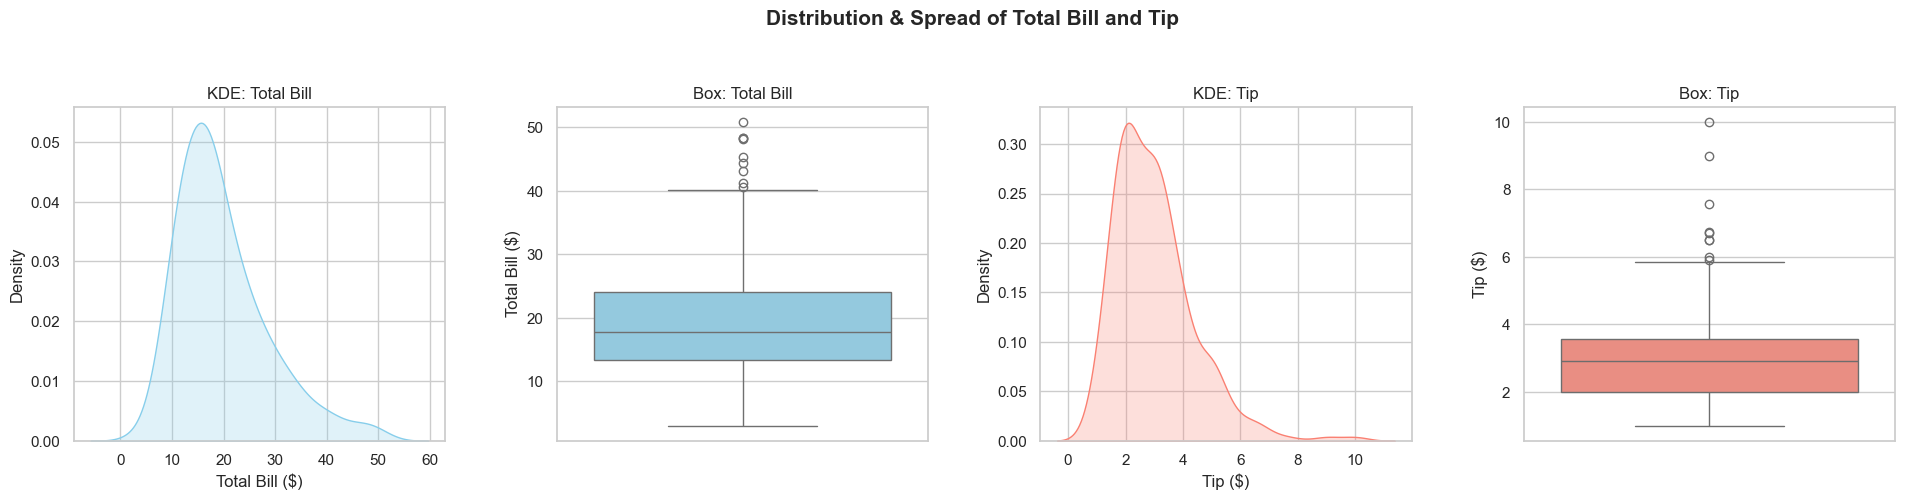

In [38]:
# Setup 1 row, 4 columns (KDE + Box for each of total_bill and tip)
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
fig.tight_layout(pad=4)

# -------- Total Bill --------
# KDE Plot
sns.kdeplot(df["total_bill"], fill=True, color='skyblue', ax=axs[0])
axs[0].set_title("KDE: Total Bill", fontsize=12)
axs[0].set_xlabel("Total Bill ($)")
axs[0].set_ylabel("Density")

# Box Plot
sns.boxplot(y=df["total_bill"], ax=axs[1], color='skyblue')
axs[1].set_title("Box: Total Bill", fontsize=12)
axs[1].set_ylabel("Total Bill ($)")

# -------- Tip --------
# KDE Plot
sns.kdeplot(df["tip"], fill=True, color='salmon', ax=axs[2])
axs[2].set_title("KDE: Tip", fontsize=12)
axs[2].set_xlabel("Tip ($)")
axs[2].set_ylabel("Density")

# Box Plot
sns.boxplot(y=df["tip"], ax=axs[3], color='salmon')
axs[3].set_title("Box: Tip", fontsize=12)
axs[3].set_ylabel("Tip ($)")

# Overall Title
fig.suptitle("Distribution & Spread of Total Bill and Tip", fontsize=15, fontweight='bold', y=1.05)

plt.show()

<h6>We removed extreme outlier records from the dataset to ensure model reliability and stability.

Outliers can disproportionately influence regression models, leading to skewed predictions and poor generalization on unseen data. By eliminating these anomalous values—especially in continuous features like total_bill and tip—we aim to reduce noise, improve the accuracy of statistical assumptions, and enhance overall model performance.</h6>

In [44]:
# Remove rows where tip > 8 or total_bill > 45
df_version1 = df[(df['tip'] < 8) & (df['total_bill'] < 45)]

# Display the shape of the filtered DataFrame
print(df_version1.shape)

(239, 7)


In [53]:
df_version1.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [54]:
from sklearn.preprocessing import LabelEncoder

# Let's say these are the categorical columns
categorical_cols = ['sex', 'smoker', 'day', 'time']

# Initialize LabelEncoder
le = LabelEncoder()

# Apply label encoding to each column
for col in categorical_cols:
    df_version1[col] = le.fit_transform(df_version1[col])

# Preview the transformed dataframe
df_version1.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4


In [56]:
df_version1['bill_per_person'] = df_version1['total_bill'] / df_version1['size']
df_version1['tip_per_person'] = df_version1['tip'] / df_version1['size']
df_version1['big_party'] = (df_version1['size'] >= 4).astype(int)

In [58]:
df_version1.head()

,total_bill,tip,sex,smoker,day,time,size,bill_per_person,tip_per_person,big_party
0,16.99,1.01,0,0,2,0,2,8.495000,0.505000,0
1,10.34,1.66,1,0,2,0,3,3.446667,0.553333,0
2,21.01,3.50,1,0,2,0,3,7.003333,1.166667,0
3,23.68,3.31,1,0,2,0,2,11.840000,1.655000,0
4,24.59,3.61,0,0,2,0,4,6.147500,0.902500,1


In [57]:
df_version1.corr()

,total_bill,tip,sex,smoker,day,time,size,bill_per_person,tip_per_person,big_party
total_bill,1.000000,0.619585,0.107927,0.095019,-0.019733,-0.160365,0.583545,0.627907,0.176410,0.518030
tip,0.619585,1.000000,0.051955,0.005556,0.030416,-0.097408,0.487087,0.278964,0.650448,0.424477
sex,0.107927,0.051955,1.000000,0.002248,-0.073277,-0.197494,0.065594,0.086200,0.007665,0.082693
smoker,0.095019,0.005556,0.002248,1.000000,-0.288505,-0.055217,-0.122530,0.221755,0.129338,-0.075652
day,-0.019733,0.030416,-0.073277,-0.288505,1.000000,0.638542,0.079869,-0.084591,-0.036642,0.067837
time,-0.160365,-0.097408,-0.197494,-0.055217,0.638542,1.000000,-0.087492,-0.105141,-0.025543,-0.078084
size,0.583545,0.487087,0.065594,-0.122530,0.079869,-0.087492,1.000000,-0.223033,-0.296002,0.871351
bill_per_person,0.627907,0.278964,0.086200,0.221755,-0.084591,-0.105141,-0.223033,1.000000,0.512154,-0.189498
tip_per_person,0.176410,0.650448,0.007665,0.129338,-0.036642,-0.025543,-0.296002,0.512154,1.000000,-0.245140
big_party,0.518030,0.424477,0.082693,-0.075652,0.067837,-0.078084,0.871351,-0.189498,-0.245140,1.000000


In [59]:
df_version1.to_csv('../datasets/clean_dataset.csv')